<a href="https://colab.research.google.com/github/Vaishu2711/Android_ChatGPT/blob/main/cvpr_project_medical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Y20.jpg to Y20.jpg
✅ Images loaded: (1, 128, 128, 1)
Epoch 1/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.9338 - loss: 0.6361
Epoch 2/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.9999 - loss: 0.6204
Epoch 3/3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 1.0000 - loss: 0.6024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


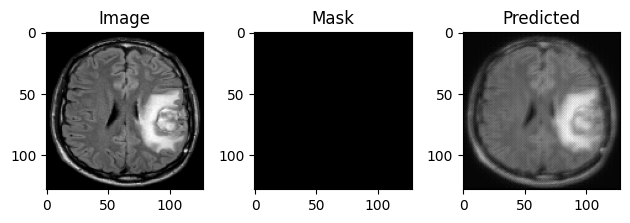

In [ ]:
# ✅ Super Simple U-Net Training on 1 or 2 Uploaded Images (No dataset required)

import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam

# --------- Upload 1 or 2 images ---------
uploaded = files.upload()

images = []
masks = []

# --------- Read and preprocess images + create dummy masks ---------
for name in uploaded.keys():
    img = cv2.imdecode(np.frombuffer(uploaded[name], np.uint8), cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128)) / 255.0
    mask = np.ones((128, 128), dtype=np.float32)  # white dummy mask
    images.append(img)
    masks.append(mask)

X = np.expand_dims(np.array(images), -1)
Y = np.expand_dims(np.array(masks), -1)

print("✅ Images loaded:", X.shape)

# --------- Mini U-Net Model ---------
def unet_model(input_size=(128, 128, 1)):
    inputs = Input(input_size)
    c1 = Conv2D(16, 3, activation='relu', padding='same')(inputs)
    p1 = MaxPooling2D()(c1)
    c2 = Conv2D(32, 3, activation='relu', padding='same')(p1)
    p2 = MaxPooling2D()(c2)
    c3 = Conv2D(64, 3, activation='relu', padding='same')(p2)
    u1 = Conv2DTranspose(32, 2, strides=2, padding='same')(c3)
    m1 = concatenate([u1, c2])
    c4 = Conv2D(32, 3, activation='relu', padding='same')(m1)
    u2 = Conv2DTranspose(16, 2, strides=2, padding='same')(c4)
    m2 = concatenate([u2, c1])
    c5 = Conv2D(16, 3, activation='relu', padding='same')(m2)
    output = Conv2D(1, 1, activation='sigmoid')(c5)
    return Model(inputs, output)

model = unet_model()
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# --------- Train without validation ---------
model.fit(X, Y, epochs=3, batch_size=1, verbose=1)

# --------- Predict and visualize ---------
pred = model.predict(np.expand_dims(X[0], axis=0))[0]

plt.subplot(1, 3, 1); plt.imshow(X[0].squeeze(), cmap='gray'); plt.title("Image")
plt.subplot(1, 3, 2); plt.imshow(Y[0].squeeze(), cmap='gray'); plt.title("Mask")
plt.subplot(1, 3, 3); plt.imshow(pred.squeeze(), cmap='gray'); plt.title("Predicted")
plt.tight_layout(); plt.show()
